**Proyek Pertama : Membuat Model NLP dengan TensorFlow**

Silahkan rubah Runtime dulu ke mode GPU dengan cara pilih Runtime -> Change Runtime Type -> Pilih GPU -> Save

In [12]:
# Import library 
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

**import file Dataset yang akan digunakan**


**Tampilkan 5 data teratas.**

In [13]:
datasetnya = pd.read_csv('bbc-news-data.csv', sep='\t')
datasetnya.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


**Munculkan 5 data teratas**

In [15]:
new_dataset = datasetnya.drop(columns=['filename'])
new_dataset.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [16]:
kategori = pd.get_dummies(new_dataset.category)
newest_dataset = pd.concat([new_dataset, kategori], axis=1)
newest_dataset = newest_dataset.drop(columns='category')
newest_dataset

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


**Ubah nilai pada dataframe menjadi sebuah numpy array**

In [17]:
bbc_news = newest_dataset['title'].values + '' + newest_dataset['content'].values
bbc_berita = newest_dataset[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [23]:
# Munculkan isi Array
bbc_news

array(['Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

**Lihat label Array**

In [19]:
bbc_berita

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

**Bagi data menjadi dua data training dan data Validation**

In [20]:
bbc_news_train, bbc_news_test, bbc_berita_train, bbc_berita_test = train_test_split(bbc_news, bbc_berita, test_size=0.2)

**Proses Tokenizer**

In [21]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(bbc_news_train) 
tokenizer.fit_on_texts(bbc_news_test)
 
sekuens_train = tokenizer.texts_to_sequences(bbc_news_train)
sekuens_test = tokenizer.texts_to_sequences(bbc_news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

**Implementasikan Embedding pada Keras**

In [22]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(5, activation='softmax')
     ])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 batch_normalization (BatchN  (None, None, 64)         256       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

Implementasi Callback

Untuk menghentikan proses ketika aAkurasi telah melebihi batas yang di tentukan

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.75 and logs.get('val_acc')>0.9):
      self.model.stop_training = True
      print("\nAkurasinya > 75%!")

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks = myCallback()

Proses Fit Model

In [25]:
history = model.fit(padded_train, bbc_berita_train, epochs=50, 
                    validation_data=(padded_test, bbc_berita_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 21s - loss: 1.6018 - acc: 0.2483 - val_loss: 1.6009 - val_acc: 0.2607 - 21s/epoch - 367ms/step
Epoch 2/50
56/56 - 12s - loss: 1.2424 - acc: 0.5096 - val_loss: 1.5453 - val_acc: 0.6067 - 12s/epoch - 207ms/step
Epoch 3/50
56/56 - 12s - loss: 0.6289 - acc: 0.7854 - val_loss: 1.4392 - val_acc: 0.6247 - 12s/epoch - 222ms/step
Epoch 4/50
56/56 - 12s - loss: 0.3116 - acc: 0.9084 - val_loss: 1.3146 - val_acc: 0.6652 - 12s/epoch - 210ms/step
Epoch 5/50
56/56 - 12s - loss: 0.1902 - acc: 0.9506 - val_loss: 1.1484 - val_acc: 0.6876 - 12s/epoch - 208ms/step
Epoch 6/50
56/56 - 12s - loss: 0.0864 - acc: 0.9725 - val_loss: 0.9688 - val_acc: 0.6831 - 12s/epoch - 206ms/step
Epoch 7/50
56/56 - 12s - loss: 0.0368 - acc: 0.9916 - val_loss: 0.6818 - val_acc: 0.7461 - 12s/epoch - 208ms/step
Epoch 8/50
56/56 - 12s - loss: 0.0292 - acc: 0.9944 - val_loss: 0.9879 - val_acc: 0.6719 - 12s/epoch - 210ms/step
Epoch 9/50
56/56 - 12s - loss: 0.0459 - acc: 0.9910 - val_loss: 0.9647 - val_acc: 0.7236

**Tampilan Model Akurasi**

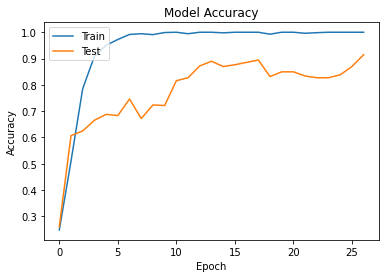

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Tampilanlan Model Loss**

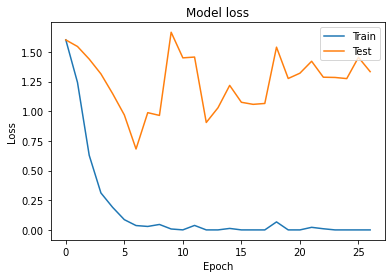

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()